In [54]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA as sklearnPCA
from sklearn import tree
from sklearn.metrics import precision_score,recall_score,confusion_matrix,f1_score
from sklearn import metrics
import itertools
import time

In [55]:
df = pd.read_csv("C:/Users/user/Desktop/study time/3rd year/IDS/Project/diabetes.csv")
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [56]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [57]:
#find no. of rows with missing values of relevent attribute
(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]==0).sum()



Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [58]:
#fill the missing values with NaNs to make them identifiable
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [59]:
#missing values are set to the average of all values of that attribute
values = df.values
df.fillna(df.mean(), inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


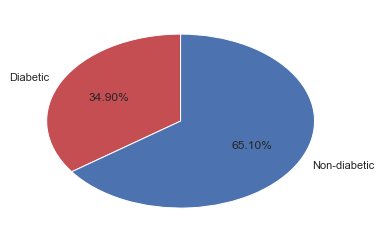

In [60]:
#visualizing the dataset

outcome = [df[df['Outcome']==1].count()['Glucose'],df[df['Outcome']==0].count()['Glucose']]
label = ['Diabetic', 'Non-diabetic']
colors = ['r', 'b']
plt.pie(outcome, labels=label, colors=colors, startangle=90, autopct='%.2f%%')
plt.show()


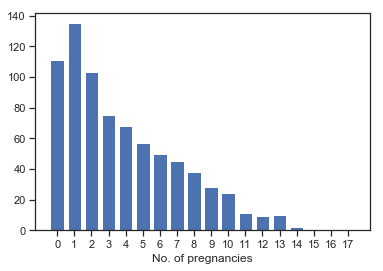

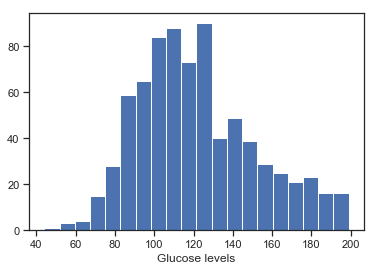

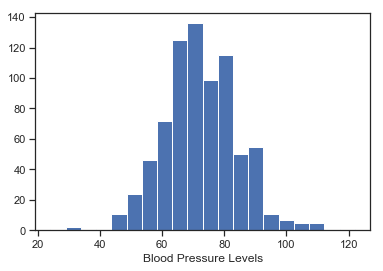

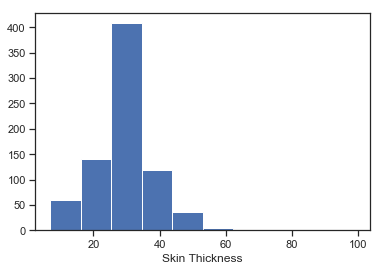

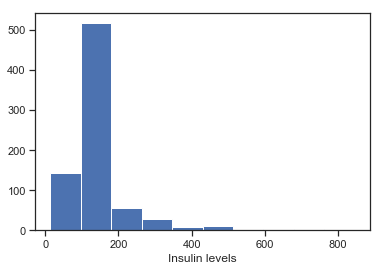

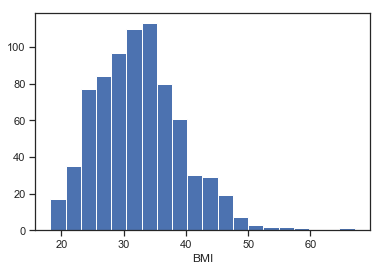

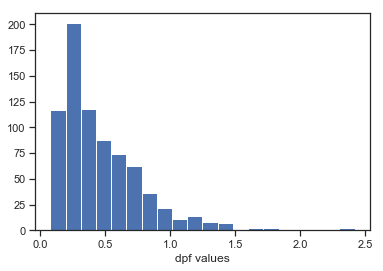

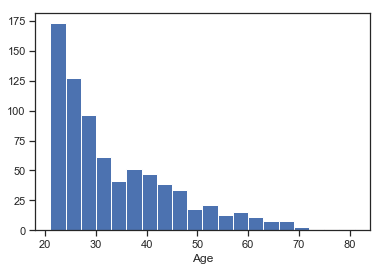

In [61]:

#pregnancies
plt.figure
x1 = np.arange(max(df['Pregnancies'])+1)
y1 = []
for i in range(len(x1)):
    y1.append(df[df['Pregnancies']==x1[i]].count()[0])
plt.bar(x1,y1)
plt.xticks(x1)
plt.xlabel('No. of pregnancies')
plt.show()

#glucose
plt.figure
x2 = df['Glucose'].values
plt.hist(x2,bins=20)
plt.xlabel('Glucose levels')
plt.show()

#blood pressure
plt.figure
x3 = df['BloodPressure'].values
plt.hist(x3,bins=20)
plt.xlabel('Blood Pressure Levels')
plt.show()

#Skin Thickness
plt.figure
x4 = df['SkinThickness'].values
plt.hist(x4,bins=10)
plt.xlabel('Skin Thickness')
plt.show()

#insulin
plt.figure
x5 = df['Insulin'].values
plt.hist(x5,bins=10)
plt.xlabel('Insulin levels')
plt.show()

#bmi
plt.figure
x6 = df['BMI'].values
plt.hist(x6,bins=20)
plt.xlabel('BMI')
plt.show()

#dpf
plt.figure
x7 = df['DiabetesPedigreeFunction'].values
plt.hist(x7,bins=20)
plt.xlabel('dpf values')
plt.show()

#age
plt.figure
x8 = df['Age'].values
plt.hist(x8,bins=20)
plt.xlabel('Age')
plt.show() 


In [62]:
X = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = df['Outcome']
X_norm = (X - X.min())/(X.max()-X.min()) #values varied
X_train,X_test,y_train,y_test = train_test_split(X_norm, y, test_size=0.33, random_state=0)
X_train.shape

(514, 8)

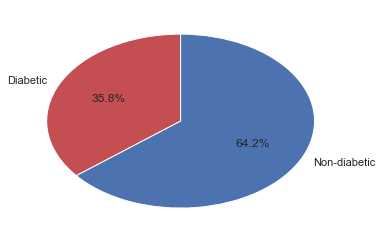

330

In [63]:
outcome = [y_train[y_train==1].count(),y_train[y_train==0].count()]
label = ['Diabetic', 'Non-diabetic']
colors = ['r', 'b']
plt.pie(outcome, labels=label, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()
y_train[y_train==0].count()

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


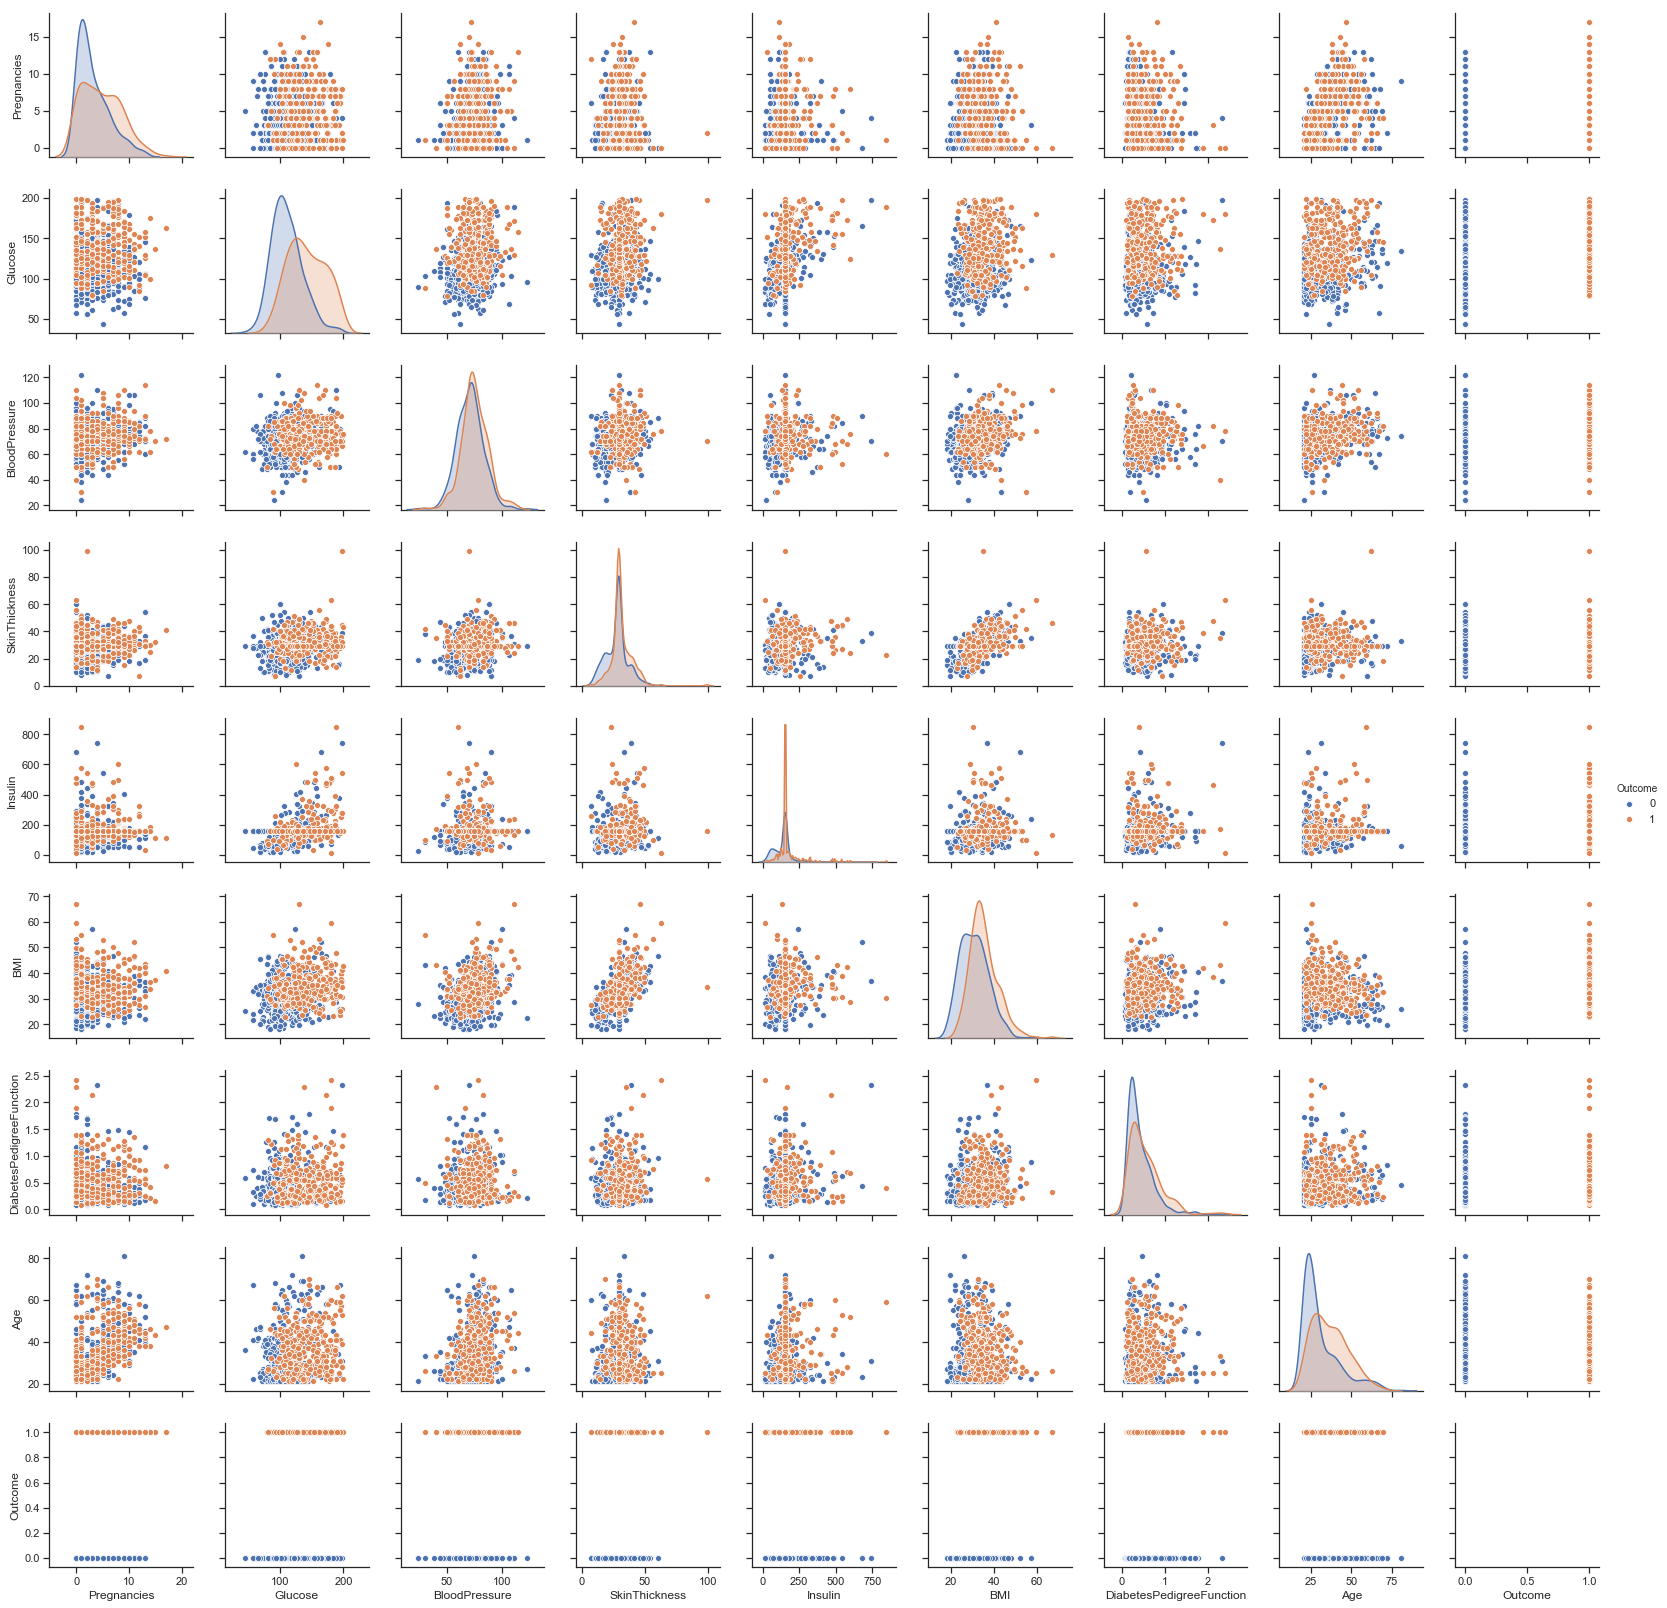

In [64]:
plt.figure
sns.set(style='ticks')
sns.pairplot(df, hue='Outcome')
plt.show()

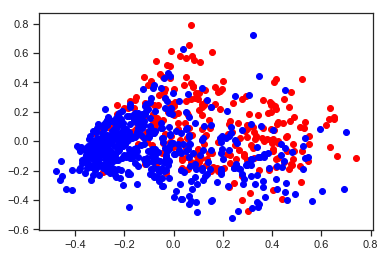

In [65]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
pca_transformed = pd.DataFrame(pca.fit_transform(X_norm))

xax = pca_transformed[0]
yax = pca_transformed[1]
plt.scatter(xax[y==1], yax[y==1], label='Diabetic', c='red')
plt.scatter(xax[y==0], yax[y==0], label='Non-diabetic', c='blue')
plt.show()

In [66]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure()
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy: 0.7795275590551181
F-score 0.5757575757575758
[[160  10]
 [ 46  38]]
--- 0.08105254173278809 seconds ---


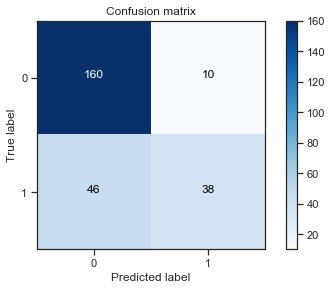

In [67]:
start_time = time.time()
clf1 = SVC(kernel='rbf', gamma=0.1, C=1)  
clf1.fit(X_train, y_train)
pred1 = clf1.predict(X_test)
sc1 = clf1.score(X_test,y_test)
f1 = f1_score(y_test,pred1)
print('Accuracy: '+str(sc1))
print('F-score '+str(f1))
cm = confusion_matrix(y_test,pred1,labels=[0,1])
plot_confusion_matrix(cm,classes=[0,1])
print("--- %s seconds ---" % (time.time() - start_time))


Accuracy: 0.7519685039370079
F-score 0.5827814569536424
[[147  23]
 [ 40  44]]
--- 0.046860694885253906 seconds ---


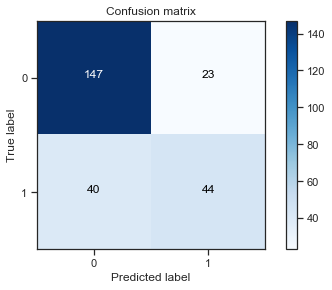

In [68]:
start_time = time.time()
clf2 = GaussianNB()
clf2.fit(X_train, y_train)
pred2 = clf2.predict(X_test)
sc2 = clf2.score(X_test,y_test)
f2 = f1_score(y_test,pred2)
print('Accuracy: '+str(sc2))
print('F-score '+str(f2))
cm = confusion_matrix(y_test,pred2,labels=[0,1])
plot_confusion_matrix(cm,classes=[0,1])
print("--- %s seconds ---" % (time.time() - start_time))


Accuracy: 0.7755905511811023
F-score 0.5777777777777777
[[158  12]
 [ 45  39]]
--- 0.08661532402038574 seconds ---


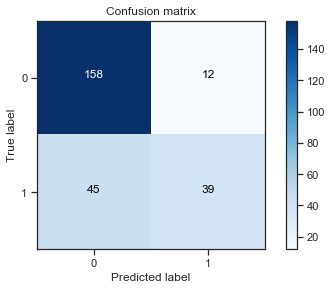

In [69]:
start_time = time.time()
clf3 = RandomForestClassifier(max_depth=6, n_estimators=8, random_state=0)
clf3.fit(X_train,y_train)
pred3 = clf3.predict(X_test)
sc3 = clf3.score(X_test,y_test)
f3 = f1_score(y_test,pred3)
print('Accuracy: '+str(sc3))
print('F-score '+str(f3))
cm = confusion_matrix(y_test,pred3,labels=[0,1])
plot_confusion_matrix(cm,classes=[0,1])
print("--- %s seconds ---" % (time.time() - start_time))

Accuracy: 0.7786561264822134
F-measure: 0.5899280575539569
[[156  14]
 [ 43  41]]
--- 0.09374451637268066 seconds ---


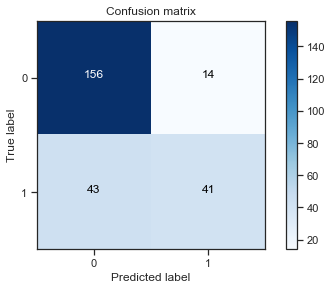

In [70]:
#max_voting
start_time = time.time()
y_test1 = np.array(y_test)
count=0
final_pred = np.array([])
for i in range(0,len(X_test)):
    final_pred = np.append(final_pred, statistics.mode([pred1[i],pred2[i],pred3[i]]))
for i in range(len(final_pred)):
    if final_pred[i]==y_test1[i]:
        count+=1
sc=count/(i)
print('Accuracy: '+str(sc))
f = f1_score(y_test,final_pred)
print('F-measure: '+str(f))
cm = confusion_matrix(y_test,final_pred,labels=[0,1])
plot_confusion_matrix(cm,classes=[0,1])
print("--- %s seconds ---" % (time.time() - start_time))